In [502]:
# standard library imports
import csv
import datetime as dt
import json
import os
import statistics
import time
from ast import literal_eval
import itertools
import time
import re
# third-party imports"
import numpy as np
import pandas as pd
import plotly as plt
#import requests

# customisations - ensure tables show all columns
pd.set_option("display.max_columns", 500)
# Set the display option to disable scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Reading data

In [578]:
model_data = pd.read_csv('Dane_scrapowanie/Final_data/model_data.csv')

# Final changes to variables

In [579]:
model_data.dropna()

,name_x,steam_appid,required_age,controller_support,dlc,website,developers,publishers,demos,platforms,categories,genres,achievements,english,price,recommendations_total,name_y,average_forever,median_forever,min_owners,max_owners,average_x,rating,Action,Free_to_Play,Strategy,Adventure,Indie,Animation_Modeling,Video_Production,RPG,Casual,Simulation,Racing,Massively_Multiplayer,Nudity,Violent,Sports,Early_Access,Gore,Design_Illustration,Education,Web_Publishing,Game_Development,Utilities,Software_Training,Audio_Production,Photo_Editing,Sexual_Content,Movie,Accounting,game_age_days
0,Counter-Strike,10,0,0,0,0,Valve,Valve,0,0,Multi-player;PvP;Online PvP;Shared/Split Scree...,['Action'],0,1,35.99,135326,Counter-Strike,13859.00,198.00,10000000.00,20000000.00,25684.38,96.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8249
1,Team Fortress Classic,20,0,0,0,0,Valve,Valve,0,0,Multi-player;PvP;Online PvP;Shared/Split Scree...,['Action'],0,1,17.99,5319,Team Fortress Classic,972.00,13.00,5000000.00,10000000.00,136.82,84.07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8829
2,Day of Defeat,30,0,0,0,1,Valve,Valve,0,0,Multi-player;Valve Anti-Cheat enabled,['Action'],0,1,17.99,3595,Day of Defeat,866.00,25.00,5000000.00,10000000.00,280.77,87.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7338
3,Deathmatch Classic,40,0,0,0,0,Valve,Valve,0,0,Multi-player;PvP;Online PvP;Shared/Split Scree...,['Action'],0,1,17.99,1844,Deathmatch Classic,1505.00,9.00,5000000.00,10000000.00,20.68,78.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8037
4,Half-Life: Opposing Force,50,0,0,0,0,Gearbox Software,Valve,0,0,Single-player;Multi-player;Valve Anti-Cheat en...,['Action'],0,1,17.99,14880,Half-Life: Opposing Force,1041.00,168.00,2000000.00,5000000.00,162.46,92.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52915,KIDNEY STONE Clicker,2410420,0,0,0,0,Takumi Abe,Takumi Abe,0,1,Single-player;Steam Achievements;Steam Cloud,['Casual'],10,1,15.33,0,KIDNEY STONE Clicker,0.00,0.00,0.00,20000.00,0.00,50.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19
52916,Magic Machine Gun,2411660,0,0,0,0,Claypot Studio,Claypot Studio,0,1,Single-player;Partial Controller Support,"['Action', 'Indie']",0,1,17.99,0,Magic Machine Gun,0.00,0.00,0.00,20000.00,0.00,64.08,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17
52917,No Ghost in Sky Elevator,2412050,0,0,0,0,Midori Games / みどりげーむず,Midori Games / みどりげーむず,0,1,Single-player;Steam Achievements,"['Adventure', 'Casual', 'Indie']",48,1,4.49,0,No Ghost in Sky Elevator,0.00,0.00,0.00,20000.00,2.00,75.00,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22
52918,It Is Ticking,2412700,0,0,0,0,YenThe Studio,YenThe Studio,0,1,Single-player;Steam Workshop;Includes level ed...,"['Casual', 'Indie', 'Strategy']",0,1,32.97,0,It Is Ticking,0.00,0.00,0.00,20000.00,3.00,76.90,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17


In [580]:
model_data.isna().sum()

name_x                     0
steam_appid                0
required_age               0
controller_support         0
dlc                        0
website                    0
developers                 0
publishers                 0
demos                      0
platforms                  0
categories                 0
genres                     0
achievements               0
english                    0
price                      0
recommendations_total      0
name_y                     0
average_forever            0
median_forever             0
min_owners                 0
max_owners                 0
average_x                645
rating                     0
Action                     0
Free_to_Play               0
Strategy                   0
Adventure                  0
Indie                      0
Animation_Modeling         0
Video_Production           0
RPG                        0
Casual                     0
Simulation                 0
Racing                     0
Massively_Mult

In [581]:
model_data.columns

Index(['name_x', 'steam_appid', 'required_age', 'controller_support', 'dlc',
       'website', 'developers', 'publishers', 'demos', 'platforms',
       'categories', 'genres', 'achievements', 'english', 'price',
       'recommendations_total', 'name_y', 'average_forever', 'median_forever',
       'min_owners', 'max_owners', 'average_x', 'rating', 'Action',
       'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling',
       'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing',
       'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access',
       'Gore', 'Design_Illustration', 'Education', 'Web_Publishing',
       'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days'],
      dtype='object')

In [582]:
model_data.shape[0]

52920

In [583]:
x1_drop = ['steam_appid','name_x','name_y','median_forever','min_owners','max_owners']

In [584]:
x2_drop = ['name_x','name_y','median_forever','min_owners','max_owners']

In [585]:
analysis_data = model_data.drop(x2_drop ,axis=1)

In [586]:
analysis_data.shape[0]

52920

In [587]:
model_data = model_data.drop(x1_drop ,axis=1)

In [588]:
model_data.columns

Index(['required_age', 'controller_support', 'dlc', 'website', 'developers',
       'publishers', 'demos', 'platforms', 'categories', 'genres',
       'achievements', 'english', 'price', 'recommendations_total',
       'average_forever', 'average_x', 'rating', 'Action', 'Free_to_Play',
       'Strategy', 'Adventure', 'Indie', 'Animation_Modeling',
       'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing',
       'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access',
       'Gore', 'Design_Illustration', 'Education', 'Web_Publishing',
       'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days'],
      dtype='object')

Transformation: Given that the majority of the games have a required_age of 0, this variable is highly skewed.
For instance, tree-based algorithms can handle skewed data, but if you plan to use a linear model or a neural network, you might need to apply a transformation (e.g., log transformation) to reduce skewness. However, given that almost all values are 0, a transformation might not be effective in this case. We also could aproach this in another way, 1 will be assigned to different than 0 values and 0 to 0'. We will add this transformed column to our dataset and create two separate models for linear regression.

In [589]:
#required_age

In [590]:
model_data['age_restriction'] = model_data['required_age'].apply(lambda x: 1 if x > 0 else 0)

In [591]:
model_data['age_restriction'].value_counts()

0    52092
1      828
Name: age_restriction, dtype: int64

In [592]:
model_data['developers'].value_counts()

Choice of Games               131
Creobit                       126
Laush Dmitriy Sergeevich       97
KOEI TECMO GAMES CO., LTD.     93
Sokpop Collective              91
                             ... 
Nicholas Pellegrino             1
TENBIRDS                        1
Torchlight Studio               1
ultale game production          1
KAME                            1
Name: developers, Length: 33354, dtype: int64

In [593]:
model_data['publishers'].value_counts()

Big Fish Games    419
8floor            214
not_provided      213
HH-Games          150
Strategy First    144
                 ... 
Last Tower          1
Hestia Games        1
Slugsoft            1
AltairRozali        1
KAME                1
Name: publishers, Length: 28727, dtype: int64

In [594]:
import category_encoders as ce
from sklearn.model_selection import KFold

# Define your target variable
target = 'rating'

# Define the columns to encode
cols_to_encode = ['developers', 'publishers']

# Initialize the KFold class with different splits
k_values = [5, 10]

for k in k_values:
    # Create a copy of the dataframe
    df_encoded = df.copy()

    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize the target encoder
    encoder = ce.TargetEncoder()

    for train_index, valid_index in kf.split(df):
        # Split the data into training and validation sets
        train_data, valid_data = df.iloc[train_index, :], df.iloc[valid_index, :]
        
        # Fit the encoder on the training data
        encoder.fit(train_data[cols_to_encode], train_data[target])
        
        # Transform the validation data
        valid_encoded = encoder.transform(valid_data[cols_to_encode])
        
        # Add the encoded columns to df_encoded
        for col in cols_to_encode:
            df_encoded.loc[valid_index, f'{col}_encoded_k{k}'] = valid_encoded[col]

    # Now df_encoded contains the target-encoded columns
    # Add the encoded columns to the original dataframe
    for col in cols_to_encode:
        df[f'{col}_encoded_k{k}'] = df_encoded[f'{col}_encoded_k{k}']


In [595]:
model_data = df_encoded.copy()

In [596]:
#genres - already one hot encoded so we can drop
model_data =model_data.drop('genres',axis=1)

In [597]:
#average_x nie korzystamy z tego ze względu na duże odchylenia i niepełne zbiory danych
model_data = model_data.drop('average_x',axis=1)

In [598]:
#we are left with categories, there are ~5000 different combinations in this column that consist of 39 different categories,
# we could hot encode this as it's only 39 column although linear regression model will be quite problematic to perform

In [599]:
model_data['categories'].value_counts()

Single-player                                                                                                                                                                                         12472
Single-player;Steam Achievements                                                                                                                                                                       5055
Single-player;Steam Achievements;Steam Cloud                                                                                                                                                           1921
Single-player;Partial Controller Support                                                                                                                                                               1756
Single-player;Tracked Controller Support;VR Only                                                                                                                                        

In [600]:
from sklearn.preprocessing import MultiLabelBinarizer

# Split the 'categories' column into a list of categories
model_data['categories'] = model_data['categories'].str.split(';')

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'categories' column
categories_encoded = mlb.fit_transform(model_data['categories'])

# Convert the result into a DataFrame and add column names
categories_encoded_df = pd.DataFrame(categories_encoded, columns=mlb.classes_)

# Replace spaces with underscores in column names
categories_encoded_df.columns = categories_encoded_df.columns.str.replace(' ', '_')

# Concatenate the original DataFrame with the new 'categories' DataFrame
model_data_encoded = pd.concat([model_data, categories_encoded_df], axis=1)

# Drop the original 'categories' column (optional)
#model_data_encoded = model_data_encoded.drop('categories', axis=1)


In [601]:
model_data_encoded.head()

,required_age,controller_support,dlc,website,developers,publishers,demos,platforms,categories,achievements,english,price,recommendations_total,average_forever,rating,Action,Free_to_Play,Strategy,Adventure,Indie,Animation_Modeling,Video_Production,RPG,Casual,Simulation,Racing,Massively_Multiplayer,Nudity,Violent,Sports,Early_Access,Gore,Design_Illustration,Education,Web_Publishing,Game_Development,Utilities,Software_Training,Audio_Production,Photo_Editing,Sexual_Content,Movie,Accounting,game_age_days,age_restriction,developers_encoded_k5,publishers_encoded_k5,developers_encoded_k10,publishers_encoded_k10,categories_encoded_k5,categories_encoded_k10,Captions_available,Co-op,Commentary_available,Cross-Platform_Multiplayer,Full_controller_support,In-App_Purchases,Includes_Source_SDK,Includes_level_editor,LAN_Co-op,LAN_PvP,MMO,Mods,Mods_(require_HL2),Multi-player,Online_Co-op,Online_PvP,Partial_Controller_Support,PvP,Remote_Play_Together,Remote_Play_on_Phone,Remote_Play_on_TV,Remote_Play_on_Tablet,Shared/Split_Screen,Shared/Split_Screen_Co-op,Shared/Split_Screen_PvP,Single-player,Stats,Steam_Achievements,Steam_Cloud,Steam_Leaderboards,Steam_Trading_Cards,Steam_Turn_Notifications,Steam_Workshop,SteamVR_Collectibles,Tracked_Controller_Support,VR_Only,VR_Support,VR_Supported,Valve_Anti-Cheat_enabled
0,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,35.99,135326,13859.00,96.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8249,0,76.60,78.85,78.37,80.46,65.52,65.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,17.99,5319,972.00,84.07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8829,0,76.60,78.85,78.98,81.97,67.26,67.26,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,Valve,Valve,0,0,"[Multi-player, Valve Anti-Cheat enabled]",0,1,17.99,3595,866.00,87.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7338,0,76.96,80.10,77.71,80.79,66.39,66.38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,17.99,1844,1505.00,78.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8037,0,80.71,83.12,80.21,83.02,67.96,67.96,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,Gearbox Software,Valve,0,0,"[Single-player, Multi-player, Valve Anti-Cheat...",0,1,17.99,14880,1041.00,92.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8615,0,68.02,79.74,67.67,81.61,65.57,65.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [602]:
model_data_encoded = model_data_encoded.rename(columns={
    'Valve_Anti-Cheat_enabled': 'Valve_AntiCheat_enabled', 
    'Mods_(require_HL2)': 'require_HL2',    
    'Shared/Split_Screen': 'Shared_Split_Screen',
    'Shared/Split_Screen_Co-op': 'Shared_Split_Screen_Coop',
    'Shared/Split_Screen_PvP': 'Shared_Split_Screen_PvP',
    'Multi-player': 'Multi_player',
    'Cross-Platform_Multiplayer':'Cross_Platform_Multiplayer',
    'Co-op':'Coop',
    'In-App_Purchases':'InApp_Purchases',
    'LAN_Co-op':'LAN_Coop',
    'Single-player':'Single_player',
    'Online_Co-op':'Online_coop'})

In [603]:
model_data = model_data_encoded.copy()

In [638]:
model_data.head()

,required_age,controller_support,dlc,website,developers,publishers,demos,platforms,categories,achievements,english,price,recommendations_total,average_forever,rating,Action,Free_to_Play,Strategy,Adventure,Indie,Animation_Modeling,Video_Production,RPG,Casual,Simulation,Racing,Massively_Multiplayer,Nudity,Violent,Sports,Early_Access,Gore,Design_Illustration,Education,Web_Publishing,Game_Development,Utilities,Software_Training,Audio_Production,Photo_Editing,Sexual_Content,Movie,Accounting,game_age_days,age_restriction,developers_encoded_k5,publishers_encoded_k5,developers_encoded_k10,publishers_encoded_k10,categories_encoded_k5,categories_encoded_k10,Captions_available,Coop,Commentary_available,Cross_Platform_Multiplayer,Full_controller_support,InApp_Purchases,Includes_Source_SDK,Includes_level_editor,LAN_Coop,LAN_PvP,MMO,Mods,require_HL2,Multi_player,Online_coop,Online_PvP,Partial_Controller_Support,PvP,Remote_Play_Together,Remote_Play_on_Phone,Remote_Play_on_TV,Remote_Play_on_Tablet,Shared_Split_Screen,Shared_Split_Screen_Coop,Shared_Split_Screen_PvP,Single_player,Stats,Steam_Achievements,Steam_Cloud,Steam_Leaderboards,Steam_Trading_Cards,Steam_Turn_Notifications,Steam_Workshop,SteamVR_Collectibles,Tracked_Controller_Support,VR_Only,VR_Support,VR_Supported,Valve_AntiCheat_enabled
0,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,35.99,135326,13859.00,96.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8249,0,76.60,78.85,78.37,80.46,65.52,65.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,17.99,5319,972.00,84.07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8829,0,76.60,78.85,78.98,81.97,67.26,67.26,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,1,Valve,Valve,0,0,"[Multi-player, Valve Anti-Cheat enabled]",0,1,17.99,3595,866.00,87.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7338,0,76.96,80.10,77.71,80.79,66.39,66.38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,17.99,1844,1505.00,78.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8037,0,80.71,83.12,80.21,83.02,67.96,67.96,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,Gearbox Software,Valve,0,0,"[Single-player, Multi-player, Valve Anti-Cheat...",0,1,17.99,14880,1041.00,92.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8615,0,68.02,79.74,67.67,81.61,65.57,65.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [639]:
# Convert the specified columns to float64
model_data[['developers_encoded_k5', 'publishers_encoded_k5', 'developers_encoded_k10', 'publishers_encoded_k10']] = model_data[['developers_encoded_k5', 'publishers_encoded_k5', 'developers_encoded_k10', 'publishers_encoded_k10']].astype(float)

# Pandas profilling

In [640]:
import pandas as pd # istotna jest wersja pandasa
print(pd.__version__)

1.5.3


In [641]:
import ydata_profiling # istotna wersja pandas_profiling
print(ydata_profiling.__version__)
from ydata_profiling import ProfileReport # najnowsza funkcja do generowania raportu

v4.2.0


In [642]:
profile = ProfileReport(model_data, title='Pandas Profiling Report')
profile.to_file("report_model_data.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Model econometry

In [643]:
import statsmodels.formula.api as smf

In [644]:
model_data.columns

Index(['required_age', 'controller_support', 'dlc', 'website', 'developers',
       'publishers', 'demos', 'platforms', 'categories', 'achievements',
       'english', 'price', 'recommendations_total', 'average_forever',
       'rating', 'Action', 'Free_to_Play', 'Strategy', 'Adventure', 'Indie',
       'Animation_Modeling', 'Video_Production', 'RPG', 'Casual', 'Simulation',
       'Racing', 'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports',
       'Early_Access', 'Gore', 'Design_Illustration', 'Education',
       'Web_Publishing', 'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days', 'age_restriction',
       'developers_encoded_k5', 'publishers_encoded_k5',
       'developers_encoded_k10', 'publishers_encoded_k10',
       'categories_encoded_k5', 'categories_encoded_k10', 'Captions_available',
       'Coop', 'Commentary_available', 'Cross_Platform_Multiplayer',
       'Fu

In [645]:
#model 1 simple econometry

In [646]:
features = ['controller_support', 'dlc', 'website', 'demos', 'platforms', 'achievements',
       'english', 'price', 'recommendations_total', 'average_forever',
       'Action', 'Free_to_Play', 'Strategy', 'Adventure', 'Indie',
       'Animation_Modeling', 'Video_Production', 'RPG', 'Casual', 'Simulation',
       'Racing', 'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports',
       'Early_Access', 'Gore', 'Design_Illustration', 'Education',
       'Web_Publishing', 'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days','Captions_available',
       'Coop', 'Commentary_available', 'Cross_Platform_Multiplayer', 'InApp_Purchases', 'Includes_Source_SDK',
       'Includes_level_editor', 'LAN_Coop', 'LAN_PvP', 'MMO', 'Mods',
       'require_HL2',  'Online_coop', 'Online_PvP',
       'Partial_Controller_Support', 'PvP', 'Remote_Play_Together',
       'Remote_Play_on_Phone', 'Remote_Play_on_TV', 'Remote_Play_on_Tablet',
       'Shared_Split_Screen', 'Shared_Split_Screen_Coop',
       'Shared_Split_Screen_PvP', 'Single_player','Multi_player', 'Stats',
       'Steam_Achievements', 'Steam_Cloud', 'Steam_Leaderboards',
       'Steam_Trading_Cards', 'Steam_Turn_Notifications', 'Steam_Workshop',
       'SteamVR_Collectibles', 'Tracked_Controller_Support', 'VR_Only',
       'VR_Support', 'VR_Supported', 'Valve_AntiCheat_enabled','age_restriction','developers_encoded_k5']
target = 'rating'
variations = ['required_age','age_restriction',
       'developers_encoded_k5', 'publishers_encoded_k5',
       'developers_encoded_k10', 'publishers_encoded_k10']
delete = ['developers','categories_encoded_k5', 'categories_encoded_k10','publishers','Full_controller_support', 'categories']

In [647]:
# Fit the ols model
m1 = smf.ols(formula='rating ~ ' + ' + '.join(features), data=model_data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     239.8
Date:                Fri, 09 Jun 2023   Prob (F-statistic):               0.00
Time:                        08:13:31   Log-Likelihood:            -2.0734e+05
No. Observations:               52920   AIC:                         4.148e+05
Df Residuals:                   52840   BIC:                         4.156e+05
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -61.6758      1.678    -36.762      0.000     -64.964     -58.388
controller_support             2.1195      0.159     13.308      0.000       1.807       2.432
dlc                            3.8246      0.153     25.062      0.000       3.526       4.124
website                        1.2982      0.117     11.108      0.000       1.069       1.527
demos                          2.3448      0.187     12.550      0.000       1.979       2.711
platforms                     -2.1745      0.133    -16.361      0.000      -2.435      -1.914
achievements                   0.0023      0.000      8.819      0.000       0.002       0.003
english                       -0.6127      0.295     -2.080      0.038      -1.190      -0.035
price                          0.0024      0.001      2.837      0.005       0.001       0.004
recommendations_total       1.817e-05   2.52e-06      7.217      0.000    1.32e-05    2.31e-05
average_forever             8.412e-05   1.49e-05      5.656      0.000     5.5e-05       0.000
Action                        -1.6043      0.119    -13.450      0.000      -1.838      -1.371
Free_to_Play                   4.4867      0.253     17.722      0.000       3.991       4.983
Strategy                      -1.1590      0.141     -8.205      0.000      -1.436      -0.882
Adventure                      0.0314      0.116      0.272      0.786      -0.195       0.258
Indie                         -0.0741      0.127     -0.585      0.558      -0.322       0.174
Animation_Modeling            -1.6345      1.368     -1.195      0.232      -4.316       1.047
Video_Production              -2.1094      1.666     -1.266      0.205      -5.374       1.155
RPG                           -0.4587      0.148     -3.108      0.002      -0.748      -0.169
Casual                        -0.0328      0.114     -0.288      0.773      -0.256       0.190
Simulation                    -0.9393      0.142     -6.629      0.000      -1.217      -0.662
Racing                        -1.3461      0.292     -4.606      0.000      -1.919      -0.773
Massively_Multiplayer         -2.5803      0.494     -5.225      0.000      -3.548      -1.612
Nudity                        -0.7677      1.484     -0.517      0.605      -3.677       2.141
Violent                       -4.6706      0.844     -5.533      0.000      -6.325      -3.016
Sports                        -0.3414      0.275     -1.241      0.215      -0.881       0.198
Early_Access                  -0.5052      0.184     -2.743      0.006      -0.866      -0.144
Gore                          -1.3242      1.073     -1.234      0.217      -3.427       0.779
Design_Illustration            1.0206      1.362      0.749      0.454      -1.649       3.691
Education                      1.3909      

#### Info
As we can see simple econometry is not good idea, so now we will try to perform some transformations on numerical data, normalization and standarization if possible

In [648]:
econometrics_data = model_data.copy()

In [649]:
from scipy import stats

# Perform Shapiro-Wilk test on your data
statistic, p_value = stats.shapiro(model_data['rating'])

# Print the test statistic and p-value
print("Shapiro-Wilk Test")
print("Test Statistic:", statistic)
print("p-value:", p_value)

Shapiro-Wilk Test
Test Statistic: 0.9840497374534607
p-value: 0.0


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [660]:
from scipy.stats import anderson

# Perform Anderson-Darling test on your data
result = anderson(econometrics_data['rating'])

# Extract the test statistic and critical values
statistic = result.statistic
critical_values = result.critical_values

# Print the test statistic and critical values
print("Anderson-Darling Test")
print("Test Statistic:", statistic)
print("Critical Values:")
for i, cv in enumerate(critical_values):
    print(f"Significance Level {result.significance_level[i]}: {cv}")


Anderson-Darling Test
Test Statistic: 184.08173807674757
Critical Values:
Significance Level 15.0: 0.576
Significance Level 10.0: 0.656
Significance Level 5.0: 0.787
Significance Level 2.5: 0.918
Significance Level 1.0: 1.092


In [650]:
from pylab import *

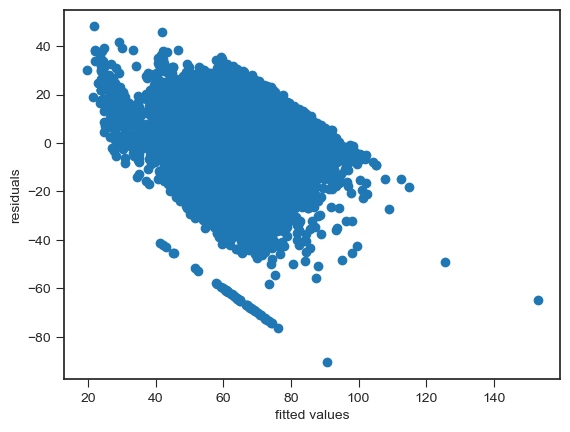

In [651]:
scatter(m1.fittedvalues, m1.resid)
xlabel('fitted values')
ylabel('residuals')
show()

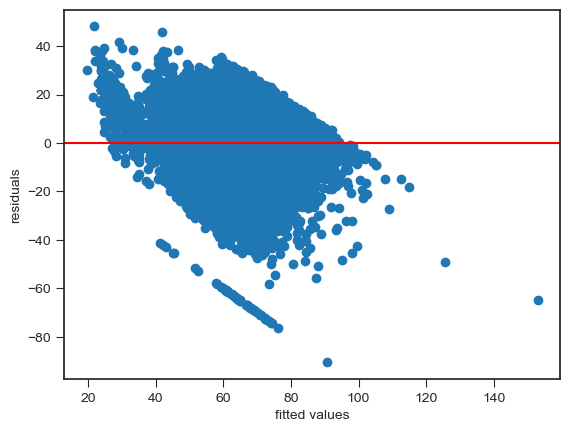

In [653]:
scatter(m1.fittedvalues, m1.resid)
axhline(y = 0, color = 'red')
xlabel('fitted values')
ylabel('residuals')
show()

In [654]:
import seaborn as sns

In [655]:
econometrics_data['residuals'] = m1.resid

In [656]:
econometrics_data['predictions'] = m1.predict()

In [657]:
econometrics_data.head()

,required_age,controller_support,dlc,website,developers,publishers,demos,platforms,categories,achievements,english,price,recommendations_total,average_forever,rating,Action,Free_to_Play,Strategy,Adventure,Indie,Animation_Modeling,Video_Production,RPG,Casual,Simulation,Racing,Massively_Multiplayer,Nudity,Violent,Sports,Early_Access,Gore,Design_Illustration,Education,Web_Publishing,Game_Development,Utilities,Software_Training,Audio_Production,Photo_Editing,Sexual_Content,Movie,Accounting,game_age_days,age_restriction,developers_encoded_k5,publishers_encoded_k5,developers_encoded_k10,publishers_encoded_k10,categories_encoded_k5,categories_encoded_k10,Captions_available,Coop,Commentary_available,Cross_Platform_Multiplayer,Full_controller_support,InApp_Purchases,Includes_Source_SDK,Includes_level_editor,LAN_Coop,LAN_PvP,MMO,Mods,require_HL2,Multi_player,Online_coop,Online_PvP,Partial_Controller_Support,PvP,Remote_Play_Together,Remote_Play_on_Phone,Remote_Play_on_TV,Remote_Play_on_Tablet,Shared_Split_Screen,Shared_Split_Screen_Coop,Shared_Split_Screen_PvP,Single_player,Stats,Steam_Achievements,Steam_Cloud,Steam_Leaderboards,Steam_Trading_Cards,Steam_Turn_Notifications,Steam_Workshop,SteamVR_Collectibles,Tracked_Controller_Support,VR_Only,VR_Support,VR_Supported,Valve_AntiCheat_enabled,residuals,predictions
0,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,35.99,135326,13859.00,96.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8249,0,76.60,78.85,78.37,80.46,65.52,65.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11.37,84.97
1,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,17.99,5319,972.00,84.07,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8829,0,76.60,78.85,78.98,81.97,67.26,67.26,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.60,81.47
2,0,0,0,1,Valve,Valve,0,0,"[Multi-player, Valve Anti-Cheat enabled]",0,1,17.99,3595,866.00,87.15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7338,0,76.96,80.10,77.71,80.79,66.39,66.38,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2.65,84.50
3,0,0,0,0,Valve,Valve,0,0,"[Multi-player, PvP, Online PvP, Shared/Split S...",0,1,17.99,1844,1505.00,78.93,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8037,0,80.71,83.12,80.21,83.02,67.96,67.96,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-10.96,89.89
4,0,0,0,0,Gearbox Software,Valve,0,0,"[Single-player, Multi-player, Valve Anti-Cheat...",0,1,17.99,14880,1041.00,92.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8615,0,68.02,79.74,67.67,81.61,65.57,65.55,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,25.96,66.83


<Axes: xlabel='predictions', ylabel='residuals'>

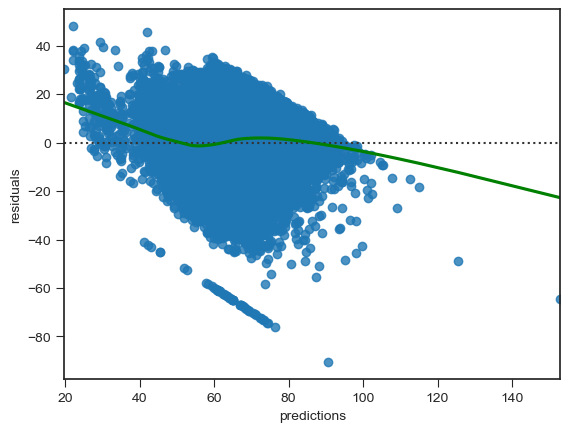

In [658]:
sns.residplot(data = econometrics_data, x = 'predictions' , y = 'residuals', lowess = True, line_kws = dict(color = 'g'))

In [661]:
import statsmodels.stats.api as sms

In [663]:
test1 = sms.het_breuschpagan(m1.resid, m1.model.exog)
test1

(1657.6401249360558,
 8.254863737771959e-294,
 21.628548424889157,
 4.989837402448291e-299)

In [664]:
from statsmodels.compat import lzip

In [665]:
nam1 = ['lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']

In [666]:
lzip(nam1, test1)

[('lagrange multiplier statistic', 1657.6401249360558),
 ('p-value', 8.254863737771959e-294),
 ('f-value', 21.628548424889157),
 ('f p-value', 4.989837402448291e-299)]

In [669]:
test2 = sms.het_white(m1.resid, m1.model.exog)
test2

AssertionError: 

In [ ]:
lzip(nam1, test2)

In [ ]:
econometrics_data['residuals2'] = m1.resid*m1.resid

In [ ]:
sms.linear_reset(m1, power = 3, test_type = 'fitted')

In [ ]:
sms.linear_reset(m1, power = 3, test_type = 'exog')

In [ ]:
hist(m1.resid, bins = 20, color = 'green', edgecolor = 'black')
show()

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.qqplot(m1.resid, line = 'r')
show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.rc('figure', figsize = (12,8))

In [ ]:
sm.graphics.influence_plot(m4, criterion = 'Cooks')
show()

In [ ]:
# Połączenie zmiennych w formułę
rhs = "+".join(features)
print(rhs)

In [ ]:
# Estymacja modelu na pełnej próbie (przypomnienie)
mod = sm.GLM.from_formula(formula="rating ~ " + rhs,
                          data=model_data, 
                          family=sm.families.Gaussian())
res = mod.fit()
res.summary()

In [ ]:
# Zaimportowanie funkcji train_test_split z sklearn
from sklearn.model_selection import train_test_split
# Podzielenie zbioru na treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(model_data, model_data.rating, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)

In [ ]:
# Wyestymowanie modelu na próbie treningowej
mod = sm.GLM.from_formula(formula="rating ~ " + rhs,
                          data=X_train, family=sm.families.Gaussian())
res = mod.fit()
# Wygenerowanie predykcji w zbiorze uczącym i testowym:
preds_tr = res.predict(X_train)
preds_te = res.predict(X_test)
# display(res.summary())

In [ ]:
from scipy import stats

# Perform Anderson-Darling test on your data
result = stats.anderson(model_data['rating'], dist='norm')

# Extract the test statistic and critical values
statistic = result.statistic
critical_values = result.critical_values

# Print the test statistic and critical values
print("Anderson-Darling Test")
print("Test Statistic:", statistic)
print("Critical Values:")
for i, cv in enumerate(critical_values):
    print(f"Significance Level {result.significance_level[i]}: {cv}")

In [ ]:
from sklearn.metrics import roc_auc_score

# Wyniki dla pojedynczej walidacji, zbiór treningowy i testowy
roc_auc_score(y_train, 1-preds_tr), roc_auc_score(y_test, 1-preds_te)

#### WHY?

If you are working with continuous data and want to evaluate the performance of your model, you can use different metrics depending on the specific task. Here are a few common metrics for evaluating regression models:

Mean Squared Error (MSE): This metric calculates the average squared difference between the predicted values and the true values. Lower MSE values indicate better model performance.

Mean Absolute Error (MAE): Similar to MSE, MAE measures the average absolute difference between the predicted and true values. It provides a measure of the average magnitude of the errors.

R-squared (R2): R-squared represents the proportion of the variance in the dependent variable that is predictable from the independent variables. It indicates the goodness of fit of the model, with higher values indicating better fit.

Root Mean Squared Error (RMSE): RMSE is the square root of the MSE and provides an interpretable scale similar to the original target variable. It is often used to provide a more intuitive understanding of the model's performance.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mean Absolute Error (MAE)
mae_train = mean_absolute_error(y_train, preds_tr)
mae_test = mean_absolute_error(y_test, preds_te)
print(f'Train MAE: {mae_train:.2f}')
print(f'Test MAE: {mae_test:.2f}')

# Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, preds_tr)
mse_test = mean_squared_error(y_test, preds_te)
print(f'Train MSE: {mse_train:.2f}')
print(f'Test MSE: {mse_test:.2f}')

# Root Mean Squared Error (RMSE)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print(f'Train RMSE: {rmse_train:.2f}')
print(f'Test RMSE: {rmse_test:.2f}')

# R-squared (R²)
r2_train = r2_score(y_train, preds_tr)
r2_test = r2_score(y_test, preds_te)
print(f'Train R2: {r2_train:.2f}')
print(f'Test R2: {r2_test:.2f}')

# Small constant
epsilon = 1e-10

# Mean Absolute Percentage Error (MAPE)
mape_train = np.mean(np.abs((y_train - preds_tr) / (y_train + epsilon))) * 100
mape_test = np.mean(np.abs((y_test - preds_te) / (y_test + epsilon))) * 100
print(f'Train MAPE: {mape_train:.2f}%')
print(f'Test MAPE: {mape_test:.2f}%')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
import numpy as np
import statsmodels.api as sm

# Define your formula here
#rhs = "your_formula_here"

# Loop over test sizes from 0.1 to 0.9
for k in range(1, 10):
    X_train, X_test, y_train, y_test = train_test_split(model_data, model_data.rating, test_size=0.1*k, random_state=0)
    
    # Fit the model on the training data
    mod = sm.GLM.from_formula(formula="rating ~ " + rhs, data=X_train, family=sm.families.Gaussian())
    res = mod.fit()
    
    # Generate predictions on the training and test sets
    preds_tr = res.predict(X_train)
    preds_te = res.predict(X_test)
    
    # Calculate metrics
    mae_train = mean_absolute_error(y_train, preds_tr)
    mae_test = mean_absolute_error(y_test, preds_te)
    mse_train = mean_squared_error(y_train, preds_tr)
    mse_test = mean_squared_error(y_test, preds_te)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, preds_tr)
    r2_test = r2_score(y_test, preds_te)
    mape_train = np.mean(np.abs((y_train - preds_tr) / y_train)) * 100
    mape_test = np.mean(np.abs((y_test - preds_te) / y_test)) * 100

    # Print metrics
    print(f'Test size: {0.1*k}')
    print(f'Train MAE: {mae_train:.2f}, Test MAE: {mae_test:.2f}')
    print(f'Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}')
    print(f'Train RMSE: {rmse_train:.2f}, Test RMSE: {rmse_test:.2f}')
    print(f'Train R2: {r2_train:.2f}, Test R2: {r2_test:.2f}')
    print(f'Train MAPE: {mape_train:.2f}%, Test MAPE: {mape_test:.2f}%')
    print('\n')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import KFold
df = model_data
def CVTest(nFolds = 5, randomState=2020):
    # Podzielenie zbioru na foldy
    kf = KFold(n_splits = nFolds, shuffle=True, random_state=randomState)
    # Stworzenie listy z wynikami
    trainResults = []
    testResults = []
    # Pętla do estymacji i walidacji modeli na kolejnych foldach
    for train, test in kf.split(df.index.values):
        # Stworzenie modelu
        mod = sm.GLM.from_formula(formula="rating ~ " + rhs,
                                  data=df.iloc[train], family=sm.families.Gaussian())
        # Estymacja
        res = mod.fit()
        # Zapisanie predykcji
        predsTrain = res.predict()
        preds = res.predict(df.iloc[test])
        
        # Calculate metrics for training set
        mae_train = mean_absolute_error(df.rating.iloc[train], predsTrain)
        mse_train = mean_squared_error(df.rating.iloc[train], predsTrain)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(df.rating.iloc[train], predsTrain)
        mape_train = np.mean(np.abs((df.rating.iloc[train] - predsTrain) / df.rating.iloc[train])) * 100

        # Calculate metrics for test set
        mae_test = mean_absolute_error(df.rating.iloc[test], preds)
        mse_test = mean_squared_error(df.rating.iloc[test], preds)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(df.rating.iloc[test], preds)
        mape_test = np.mean(np.abs((df.rating.iloc[test] - preds) / df.rating.iloc[test])) * 100

        # Append results
        trainResults.append([mae_train, mse_train, rmse_train, r2_train, mape_train])
        testResults.append([mae_test, mse_test, rmse_test, r2_test, mape_test])

    # Convert results to numpy arrays
    trainResults = np.array(trainResults)
    testResults = np.array(testResults)

    # Return mean results
    return trainResults.mean(axis=0), testResults.mean(axis=0)


In [ ]:
for nFolds in [5,10]:
    for randomState in [1, 17, 200, 2020]:
        print(nFolds, randomState, CVTest(nFolds, randomState))

# SVM

# KNN

## 1.3. Wady dystansów
Dystanse są bardzo pomocne w określaniu podobieństw, ale nie są pozbawione wad. Przede wszystkim jest to prosta, absolutna i abstrakcyjna miara. Stosowanie wartości absolutnych może silnie rzutować na zdolności predykcyjne kNN, np. w sytuacji w której jedna ze zmiennych objaśnianych operuje na dużo większej dziedzinie i jednocześnie nie ma dużej mocy predykcyjnej. W tej sytuacji ten jeden wymiar będzie bardzo silnie wpływał na odległość, może nawet zdominować wszystkie pozostałe zmienne i jednocześnie nie będzie pomagał w skutecznej predykcji.

Oczywistym rozwiązaniem powyższego problemu jest skalowanie/normalizacja/standaryzacja posiadanych zmiennych. Odpowiednie przygotowanie danych to krok, który niemal zawsze powinniśmy wykonać decydując sie na wykorzystanie kNN. Najczęściej stosowane metody standaryzacji zmiennych to:
* Prosta normalizacja, polegajaca na odjęciu średniej wartości i podzieleniu przez odchylenie standardowe (z-score): $z = {x- \mu \over \sigma}$
* Standaryzacja na przedziale [0,1], przez przesuniecie i podział przez "rozpiętość" $X\_new = \frac{X - min(X)}{max(X) - min(X)}$. Należy pamiętać, że stosowanie tego typu standaryzacji może przynieść bardzi duże "zagęszczenie" obserwacji w środku przedziału jeżeli wcześniej nasza zmienna miała rozkład przypominający normalny (o długich ogonach).
* Normalizacja kwantylowa. Możliwa jest równiez zmiana danego rozkladu zmienniej na niemalże dowolny inny rozkład z wykorzystaniem normalizacji kwantylowej (gdzie dopasowujemy nowe wartości patrząc na kwantyle rozkładu). Warto z niej pewnie korzystać wyłącznie w specjalistycznych sytuacjach.

## 1.4 Standaryzacja zmiennych nominalnych
Zmienne nominalne stanowią odrobinę inny problem. Możemy go rozwiązać stosując binaryzację poziomów lub w przypadku uporzadkowanej zmiennej wielopoziomowej rozłożyć wartości równomiernie na przestrzeni [0,1].

Standaryzacja zmiennych nominalnych dobrze ilustruje problem kNN i stosowania dystansu jako miary podobieństwa. Zmienna binarna oznacza że dystans na tej jednej zmiennej wynosić będzie 0 lub 1. Jednocześnie kiedy znormalizowaliśmy inną zmienną ciągłą na przedziale [0,1] ponad połowa obserwacji może leżeć od siebie w dystansie mniejszym niż 0,5. W takiej sytuacji nasza zmienna binarna ma poniekąd "dwukrotnie większą wagę". Właśnie ta arbitralność dystansów przy stosowaniu miar absolutnych może stanowić istotne ograniczenie skuteczności tej metody. Może się bowiem okazać, że model będzie się spisywał znacznie lepiej jeżeli zmienne binarne zakodujemy do poziomów {0;, 0,5} lub {0;, 2}, a może jeszcze lepiej jeżeli każdą z kilku zmiennych binarnych wystandaryzujemy inaczej.

## 1.5. Klątwa wymiarowości
Z metodą kNN bezpośrednio powiązany jest problem wymiarowości. Zastanówmy się przez chwilę co to znaczy, że dwie obserwacje leżą blisko siebie. Kiedy mówimy o dwóch, trzech wymiarach jest to oczywiste i intuicyjnie wyczuwalne. Kiedy mamy więcej wymiarów np. 16, to dwie obserwacje mogą być jednocześnie blisko i daleko w poszczególnych wymiarach. Osiągnięcie bliskości we wszystkich wymiarach jest prawie niewykonalne. Stanowi to istotny problem, ponieważ w wielu wymiarach możemy mieć kilka obserwacji, które są w równej odległości każda z każdą i jednocześnie zajmują zupełnie różne fragmenty przestrzeni - najprostszy przykład to macierz jednostkowa. Jest to problem który w większości przypadków jest nierozwiązywalny. 

W niektórych zadaniach analitycznych możemy powiedzieć jednak, że problem wielowymiarowości nie jest bardzo dotkliwy. Z taką sytuacją mamy do czynienia np. w problemie rekomendacji kiedy często mamy do czynienia z macierzami rzadkimi lub w analizie obrazów gdzie bliskość we wszystkich wymiarach rzeczywiście może następować ze względu na silne korelacje wewnątrz grupowe i dobrą separację grup.

# LASY

# CLUSTERYZACJA

Clustering is an unsupervised learning method that is used to group similar instances on the basis of features. K-means is one of the most commonly used clustering algorithms.

However, K-Nearest Neighbors (KNN) is a supervised learning algorithm used for classification or regression. It's not used for clustering.

For clustering, you can use the K-Means algorithm. To find the optimal number of clusters (k), you can use the Elbow method or the Silhouette method.

Here's an example of how you can perform K-Means clustering in Python:

In [ ]:
import category_encoders as ce

# Create the encoder
encoder = ce.TargetEncoder(cols=['genres'])

# Fit and transform the data
genres_encoded = encoder.fit_transform(model_data['genres'], model_data['rating'])

C:\Users\macie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\clust

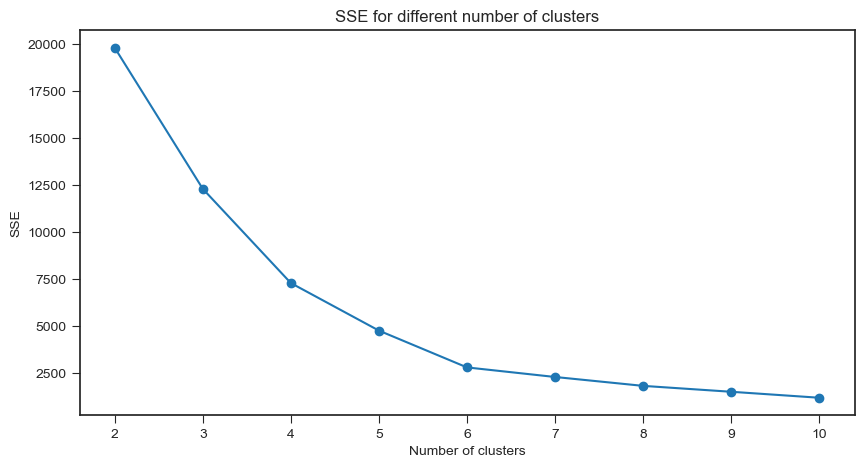

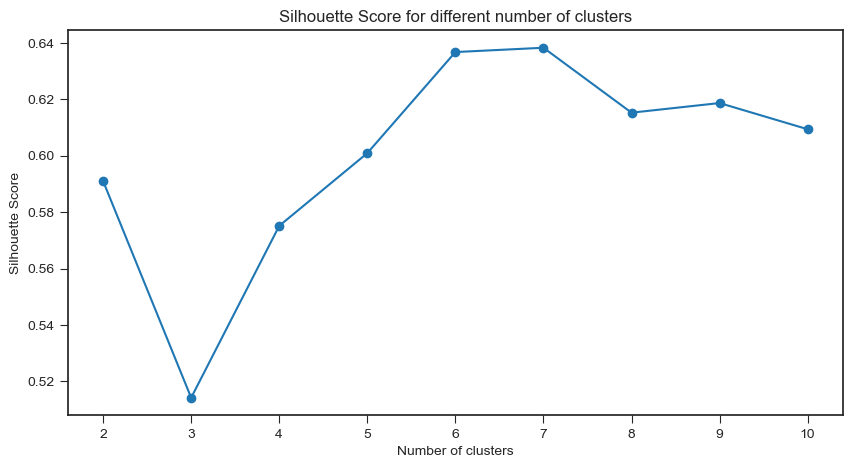

In [37]:
import category_encoders as ce
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create the encoder
encoder = ce.TargetEncoder(cols=['genres'])

# Fit and transform the data
genres_encoded = encoder.fit_transform(model_data['genres'], model_data['rating'])

# Reshape the array to have shape (n_samples, n_features)
genres_reshaped = np.array(genres_encoded['genres']).reshape(-1, 1)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
genres_scaled = scaler.fit_transform(genres_reshaped)

# List to hold the SSE for each k
sse = []
silhouette = []

# We will run the algorithm with varying k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(genres_scaled)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(genres_scaled, kmeans.labels_))

# Plot SSE for each k
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE for different number of clusters')
plt.show()

# Plot Silhouette Score for each k
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()


C:\Users\macie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


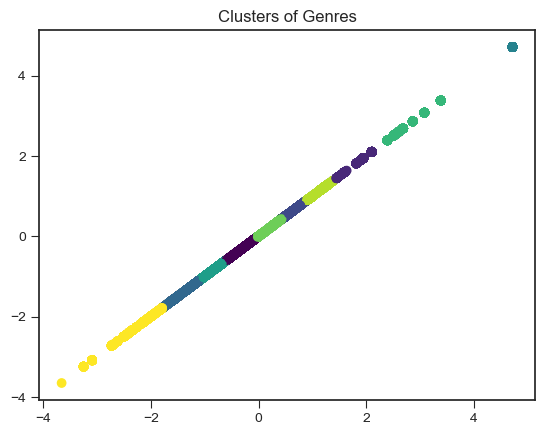

In [39]:
# Choose the optimal k based on the elbow method and silhouette score
optimal_k = 10  # replace this with your chosen k

# Fit the KMeans model with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=1)
kmeans.fit(genres_scaled)

# Assign each data point to a cluster
cluster_assignments = kmeans.labels_

# Plot the data points, colored by their assigned cluster
plt.scatter(genres_scaled[:, 0], genres_scaled[:, 0], c=cluster_assignments, cmap='viridis')
plt.title('Clusters of Genres')
plt.show()


In [54]:
features = model_data[['genres', 'categories']]


In [56]:
# Convert the list-like strings to lists
model_data['genres'] = model_data['genres'].apply(eval)

# Extract the genre names from the lists
model_data['genres'] = model_data['genres'].apply(lambda x: x[0] if x else '')

# Now you can apply the target encoder
encoder = ce.TargetEncoder(cols=['genres'])
genres_encoded = encoder.fit_transform(model_data['genres'], model_data['rating'])

C:\Users\macie\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\macie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\macie\anac

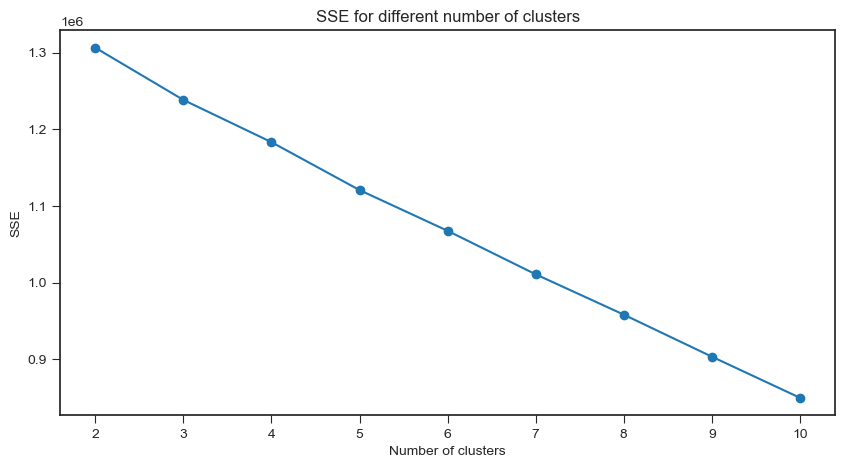

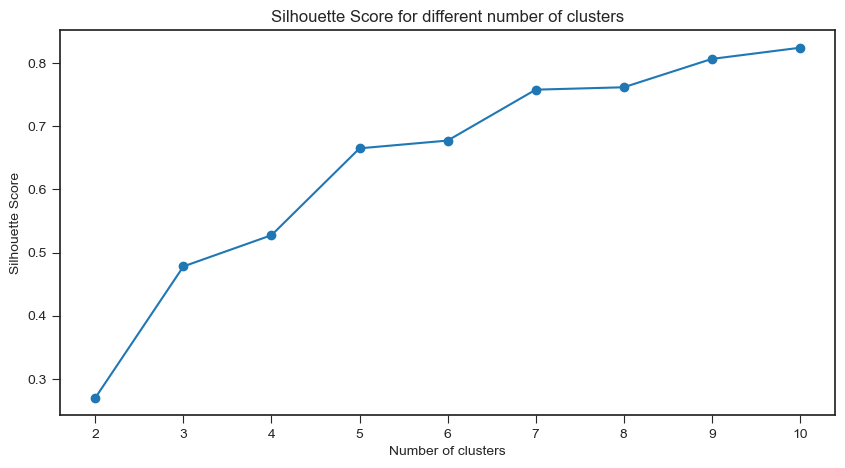

In [59]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the data
genres_encoded = encoder.fit_transform(model_data[['genres']])

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
genres_scaled = scaler.fit_transform(genres_encoded)

# List to hold the SSE for each k
sse = []
silhouette = []

# We will run the algorithm with varying k from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(genres_scaled)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(genres_scaled, kmeans.labels_))

# Plot SSE for each k
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('SSE for different number of clusters')
plt.show()

# Plot Silhouette Score for each k
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()


In [60]:
model_data['genres'].head(1)

0    Action
Name: genres, dtype: object

In [61]:
model_data['categories'].head(1)

0    Multi-player;PvP;Online PvP;Shared/Split Scree...
Name: categories, dtype: object

In [56]:
model_data['eaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

# Feature selection

# 1. Wprowadzenie
W wielu przypadkach będziemy mieli do dyspozycji bardzo dużo zmiennych objaśniających. W zależności od algorytmu który zostanie wykorzystany. Zadaniem, przed którym staniemy będzie wybór odpowiednich zmiennych do wykorzystania w modelowaniu, ograniczenie ich liczby, a nie jak w wielu przypadkach znajdowanie/tworzenie nowych zmiennych.

## 1.1 Od ogólnego do szczególnego
W przypadku większości algorytmów możemy rozpocząć od pełnego zestawu zmiennych, a następnie usuwać kolejno po jednej zmiennej i w walidacji krzyżowej sprawdzać, czy osiągniemy poprawę. Kolejne zmienne będziemy usuwać tak długo aż usunięcie kolejnej nie przyniesie poprawy. Metoda ta nie jest idealna, a przy jej stosowaniu musimy pamiętać o kilku rzeczach:
* Procedura nie gwarantuje osiągnięcia optymalnych rezultatów. Możliwa jest sytuacja w której zmiana kolejności usuwania doprowadzi do lepszego rezultatu (np. gdy w pierwszym kroku od razu usuniemy trzy "najgorsze" zmienne).
* Skuteczność tej metody zależy od charakterystyk algorytmu, np. jego odporności na korelację zmiennych objaśniających.
* W przypadku bardzo wielu zmiennych metoda może okazać się bardzo czasochłonna.

## 1.2 Od szczególnego do ogólnego
Procedurę wybierania zmiennych możemy rozpocząć od postaci szczególnej, czyli modelu z jedną zmienną, a następnie kolejno dodawać zmienne. W pierwszej kolejności uruchamiamy iteracje modelu z jedną zmienną, wybieramy najlepszy model, a następnie testujemy wszystkie pozostałe zmienne jako kandydata na drugą zmienną. Procedurę powtarzemy tak długo aż dodawanie kolejnych zmiennych nie przyniesie poprawy modelu.
* Procedura nie gwartanuje osiągnięcia optymalnych rezultatów. Możliwa jest sytuacja w której dwie "gorsze" zmienne dadzą łącznie lepszy rezultat niż trzy najlepsze zmienne łącznie (np. ze względu na problem autokoleracji).
* Skuteczność metody zależy od charakterystyk algorytmu.
* W przypadku bardzo wielu zmiennych metoda może okazać się bardzo czasochłonna.

## 1.3. Sprawdzanie wszystkich kombinacji
W niektórych przypadkach najlepszym rozwiązaniem może być sprawdzenie wszystkich kombinacji. Naturalnie ze względu na koszt obliczeniowy możemy stosować tę metodą wyłącznie w sytuacji, w której liczba zmiennych jest relatywnie niska (zwykle poniżej 10).

In [131]:
model_data.columns

Index(['name_x', 'steam_appid', 'required_age', 'controller_support', 'dlc',
       'website', 'developers', 'publishers', 'demos', 'platforms',
       'categories', 'genres', 'achievements', 'english', 'price',
       'recommendations_total', 'name_y', 'average_forever', 'median_forever',
       'min_owners', 'max_owners', 'average_x', 'rating', 'Action',
       'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling',
       'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing',
       'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access',
       'Gore', 'Design_Illustration', 'Education', 'Web_Publishing',
       'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days'],
      dtype='object')

In [ ]:
x = ['required_age', 'controller_support', 'dlc',
       'website', 'developers', 'publishers', 'demos', 'platforms',
       'categories', 'genres', 'achievements', 'english', 'price',
       'recommendations_total', 'average_forever', 'rating', 'Action',
       'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling',
       'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing',
       'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access',
       'Gore', 'Design_Illustration', 'Education', 'Web_Publishing',
       'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days']

In [132]:
target = "rating"
numFeatures = ['required_age', 'controller_support', 'dlc',
       'website', 'demos', 'platforms','achievements', 'english', 'price',
       'recommendations_total', 'average_forever', 'rating', 'Action',
       'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling',
       'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing',
       'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access',
       'Gore', 'Design_Illustration', 'Education', 'Web_Publishing',
       'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days']
catFeatures = ['developers', 'publishers','categories', 'genres']

In [133]:
from sklearn import preprocessing

In [137]:
df = model_data.copy()
mapy = {}
for feature in catFeatures:
    # Inicjujemy obiekt do kodowania, który będzie przechowywal naszą mapę
    le = preprocessing.LabelEncoder()
    # Dopasowujemy dane (tworzymy mapę i od razu ją nakładamy na zmienną)
    df[feature] = le.fit_transform(model_data[feature])
    # Zapiszmy mapę, aby móc odzyskać oryginalne dane bez problemu
    mapy[feature] = le

In [138]:
features = df.columns.tolist()
features.remove(target)
print(features)

['name_x', 'steam_appid', 'required_age', 'controller_support', 'dlc', 'website', 'developers', 'publishers', 'demos', 'platforms', 'categories', 'genres', 'achievements', 'english', 'price', 'recommendations_total', 'name_y', 'average_forever', 'median_forever', 'min_owners', 'max_owners', 'average_x', 'Action', 'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling', 'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing', 'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access', 'Gore', 'Design_Illustration', 'Education', 'Web_Publishing', 'Game_Development', 'Utilities', 'Software_Training', 'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie', 'Accounting', 'game_age_days']


In [139]:
from scipy import stats
from sklearn import feature_selection

In [140]:
df[target] = (model_data[target] == "yes").astype(int)

In [141]:
minfos=[]
for var in catFeatures:
    print("\n", var)
    print("Kendall", stats.kendalltau(df[target], df[var]))
    print("Mutual info", feature_selection.mutual_info_classif(df[var].values.reshape(-1,1),df[target].values))
    minfos.append(feature_selection.mutual_info_classif(df[var].values.reshape(-1,1),df[target].values)[0])
    print("Chi2", feature_selection.chi2(df[var].values.reshape(-1,1),df[target].values))
    print("Anova", feature_selection.f_classif(df[var].values.reshape(-1,1),df[target].values))

imp = list(zip(minfos, catFeatures))
imp.sort(reverse=True)
imp


 developers
Kendall KendalltauResult(correlation=nan, pvalue=nan)
Mutual info [0.00325019]
Chi2 (array([nan]), array([nan]))
Anova (array([nan], dtype=float32), array([nan], dtype=float32))

 publishers
Kendall KendalltauResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


Mutual info [0.0031746]
Chi2 (array([nan]), array([nan]))
Anova (array([nan], dtype=float32), array([nan], dtype=float32))

 categories
Kendall KendalltauResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


Mutual info [0.00660431]
Chi2 (array([nan]), array([nan]))
Anova (array([nan], dtype=float32), array([nan], dtype=float32))

 genres
Kendall KendalltauResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


Mutual info [0.00275888]
Chi2 (array([nan]), array([nan]))
Anova (array([nan], dtype=float32), array([nan], dtype=float32))


C:\Users\macie\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


[(0.006368102796677433, 'categories'),
 (0.0032974300831475345, 'genres'),
 (0.002938397581257912, 'developers'),
 (0.002730536659111271, 'publishers')]

In [142]:
for var in numFeatures:
    print("Values for pair {0}".format(var))
    print("Spearman", stats.spearmanr(df[target], df[var]))
    print("Mutual info", feature_selection.mutual_info_classif(df[var].values.reshape(-1,1),df[target].values))
    minfos.append(feature_selection.mutual_info_classif(df[var].values.reshape(-1,1),df[target].values)[0])

imp = list(zip(minfos, catFeatures+numFeatures))
imp.sort(reverse=True)
imp

Values for pair required_age
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair controller_support
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00113379]
Values for pair dlc
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00085979]
Values for pair website
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00671769]
Values for pair demos
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00032124]
Values for pair platforms
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00923091]
Values for pair achievements
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair english
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.01291572]
Values for pair price
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00022676]
Values for pair recommendations_total
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair average_forever
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair rating
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Action
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00435563]
Values for pair Free_to_Play
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00015117]
Values for pair Strategy
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00118103]
Values for pair Adventure
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00389267]
Values for pair Indie
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00890023]
Values for pair Animation_Modeling
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Video_Production
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair RPG
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00079365]
Values for pair Casual
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00404384]
Values for pair Simulation
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.0010771]
Values for pair Racing
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [8.50340136e-05]
Values for pair Massively_Multiplayer
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [4.72411187e-05]
Values for pair Nudity
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Violent
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [9.44822374e-06]
Values for pair Sports
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.77928949e-05]
Values for pair Early_Access
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00038738]
Values for pair Gore
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Design_Illustration
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Education
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Web_Publishing
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Game_Development
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Utilities
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [9.44822374e-06]
Values for pair Software_Training
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Audio_Production
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Photo_Editing
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Sexual_Content
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Movie
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair Accounting
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [3.21964677e-15]
Values for pair game_age_days
Spearman SpearmanrResult(correlation=nan, pvalue=nan)


C:\Users\macie\anaconda3\lib\site-packages\scipy\stats\stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


Mutual info [0.00242819]


[(0.01330309901738791, 'english'),
 (0.008919123204840673, 'platforms'),
 (0.007955404383979015, 'Indie'),
 (0.007237339380199659, 'website'),
 (0.006368102796677433, 'categories'),
 (0.004525699168559494, 'Action'),
 (0.003996598639459004, 'Adventure'),
 (0.0039588057445232305, 'Casual'),
 (0.0032974300831475345, 'genres'),
 (0.002938397581257912, 'developers'),
 (0.002730536659111271, 'publishers'),
 (0.0019179894179925938, 'game_age_days'),
 (0.0010393046107364246, 'controller_support'),
 (0.001020408163268538, 'Strategy'),
 (0.000982615268332765, 'Simulation'),
 (0.0008408919123237268, 'dlc'),
 (0.0007747543461861239, 'RPG'),
 (0.00030234315948918233, 'Early_Access'),
 (0.00026455026455340924, 'demos'),
 (0.00020786092214986063, 'price'),
 (0.00010393046107648463, 'Racing'),
 (8.503401360859808e-05, 'Free_to_Play'),
 (4.724111867282499e-05, 'Sports'),
 (1.8896447471106192e-05, 'Massively_Multiplayer'),
 (3.219646771412954e-15, 'required_age'),
 (3.219646771412954e-15, 'recommendati

In [149]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

# Przygotujmy prosty wrapper
def CVTest(nFolds = 5, randomState=2020, features=[]):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    # Aby oszczędzać pamięć informacja o foldach to wyłącznie numery wierszy
    testResults = []
    for train, test in kf.split(df.index.values):
        mod = sm.GLM.from_formula(formula=target + " ~ "+ "+".join(features),
                                  data=model_data.iloc[train], family=sm.families.Binomial())
        res = mod.fit()
        predsTrain = res.predict(model_data.iloc[train])
        preds = res.predict(model_data.iloc[test])
        testResults.append(roc_auc_score(df.rating.iloc[test], 1-preds))
        
    return np.mean(testResults)

In [150]:
imps2 = []
for var in numFeatures+catFeatures:
    res = CVTest(features=[var])
    imps2.append((res, var))
    print(var, res)

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [65]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import numpy as np

def CVTest(nFolds = 5, randomState=2020, features=[]):
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)

    testResults = []
    for train, test in kf.split(model_data.index.values):
        mod = sm.OLS(model_data[target].iloc[train], model_data[features].iloc[train])
        res = mod.fit()
        predsTrain = res.predict(model_data[features].iloc[train])
        preds = res.predict(model_data[features].iloc[test])
        testResults.append(mean_squared_error(model_data[target].iloc[test], preds))
        
    return np.mean(testResults)


In [70]:
target = "rating"
numFeatures = ['required_age', 'controller_support', 'dlc',
       'website', 'demos', 'platforms','achievements', 'english', 'price',
       'recommendations_total', 'average_forever', 'rating', 'Action',
       'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling',
       'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing',
       'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access',
       'Gore', 'Design_Illustration', 'Education', 'Web_Publishing',
       'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days']
catFeatures = ['developers', 'publishers','categories', 'genres']

features = numFeatures.copy()
#features.extend(catFeatures)

target = 'rating'  # replace this with your actual target variable name
mse = CVTest(nFolds=10, randomState=2020, features=features)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 8.625433444443712e-26


In [71]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# define the method
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)

# fit the model
rfe.fit(X, y)

# transform the data
X_transformed = rfe.transform(X)

# get the names of the selected features
selected_features = X.columns[rfe.support_]

NameError: name 'X' is not defined

In [72]:
from scipy import stats
from sklearn import feature_selection

#numFeatures earlier  # fill this with your numerical features
#target = 'your_target_variable'  # replace this with your target variable

minfos = []
for var in numFeatures:
    print("Values for pair {0}".format(var))
    print("Spearman", stats.spearmanr(model_data[target], model_data[var]))
    print("Mutual info", feature_selection.mutual_info_regression(model_data[var].values.reshape(-1,1), model_data[target].values))
    minfos.append(feature_selection.mutual_info_regression(model_data[var].values.reshape(-1,1), model_data[target].values)[0])

imp = list(zip(minfos, numFeatures))
imp.sort(reverse=True)
imp

Values for pair required_age
Spearman SignificanceResult(statistic=0.041322035765873615, pvalue=1.9121015649053206e-21)
Mutual info [0.00826843]
Values for pair controller_support
Spearman SignificanceResult(statistic=0.19058801352735047, pvalue=0.0)
Mutual info [0.02190953]
Values for pair dlc
Spearman SignificanceResult(statistic=0.25395036258031295, pvalue=0.0)
Mutual info [0.05625505]
Values for pair website
Spearman SignificanceResult(statistic=0.16174358135901495, pvalue=5.164345150250168e-307)
Mutual info [0.02605443]
Values for pair demos
Spearman SignificanceResult(statistic=0.11132682421271961, pvalue=1.5397868631000797e-145)
Mutual info [0.00597961]
Values for pair platforms
Spearman SignificanceResult(statistic=-0.1803705543503232, pvalue=0.0)
Mutual info [0.02076477]
Values for pair achievements
Spearman SignificanceResult(statistic=0.2945908104181648, pvalue=0.0)
Mutual info [0.00108677]
Values for pair english
Spearman SignificanceResult(statistic=0.001452093752068923, p

[(7.268834561777291, 'rating'),
 (0.18884936632462068, 'average_forever'),
 (0.09653074330818656, 'game_age_days'),
 (0.08834874460106334, 'price'),
 (0.06132698000448311, 'dlc'),
 (0.02871741396154448, 'website'),
 (0.02029599876073762, 'platforms'),
 (0.01758675885791483, 'controller_support'),
 (0.01687478513019447, 'recommendations_total'),
 (0.011874612371176374, 'Free_to_Play'),
 (0.010001039742304485, 'Simulation'),
 (0.009228197522818782, 'Casual'),
 (0.008874510682551184, 'demos'),
 (0.007977159629064534, 'Indie'),
 (0.005268507747486995, 'Massively_Multiplayer'),
 (0.005034262266799372, 'Violent'),
 (0.004820231875223513, 'Strategy'),
 (0.0035059419874610143, 'RPG'),
 (0.003165090510548474, 'Game_Development'),
 (0.0031042726753292005, 'required_age'),
 (0.0027909460044388545, 'Gore'),
 (0.002586769306432979, 'achievements'),
 (0.0015804463941404556, 'Adventure'),
 (0.0013509808946128299, 'Design_Illustration'),
 (0.0013199322919905665, 'Animation_Modeling'),
 (0.001257949368

In [79]:
# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

# create the RFE model and select 3 attributes
rfe = RFE(model, n_features_to_select=3)
fit = rfe.fit(model_data.drop(target, axis=1), model_data[target])

# summarize the selection of the attributes
print("Num Features: %s" % (fit.n_features_))

# Get the names of the selected features
selected_features = model_data.drop(target, axis=1).columns[fit.support_]
print("Selected Features: %s" % (selected_features))

print("Feature Ranking: %s" % (fit.ranking_))


Num Features: 3
Selected Features: Index(['dlc', 'Violent', 'Movie'], dtype='object')
Feature Ranking: [29  4  1 10  8  5 35 13 34 38 36 17  7 24 33 27 19  9 30 25 18 11  6 15
  1 20 26 14 21 22  3 32 16 23 31 12 28  1  2 37]


In [81]:
from sklearn.feature_selection import RFECV

# create a base classifier used to evaluate a subset of attributes
model = LinearRegression()

# create the RFECV model
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
fit = rfecv.fit(model_data.drop(target, axis=1), model_data[target])

# summarize the selection of the attributes
print("Optimal number of features: %d" % rfecv.n_features_)

# Get the names of the selected features
selected_features = model_data.drop(target, axis=1).columns[rfecv.support_]
print("Selected Features: %s" % (selected_features))

Optimal number of features: 32
Selected Features: Index(['required_age', 'controller_support', 'dlc', 'website', 'demos',
       'platforms', 'english', 'Action', 'Free_to_Play', 'Strategy', 'Indie',
       'Animation_Modeling', 'Video_Production', 'RPG', 'Casual', 'Simulation',
       'Racing', 'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports',
       'Early_Access', 'Gore', 'Design_Illustration', 'Education',
       'Web_Publishing', 'Utilities', 'Software_Training', 'Photo_Editing',
       'Sexual_Content', 'Movie', 'Accounting'],
      dtype='object')


In [87]:
len(model_data.columns)

41

In [90]:
from sklearn.linear_model import LassoCV

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
lasso = LassoCV(cv=2)

# We use 5-fold cross-validation
lasso.fit(model_data.drop(target, axis=1), model_data[target])

# The "coef_" attribute contains the coefficients of the features in the decision function.
coef = pd.Series(lasso.coef_, index = model_data.drop(target, axis=1).columns)

# We can sort these features by their absolute values, which gives us a measure of their importance.
imp_coef = coef.sort_values(ascending=False)
print(imp_coef)


recommendations_total    0.00
required_age             0.00
Web_Publishing           0.00
Nudity                  -0.00
Violent                 -0.00
Sports                  -0.00
Early_Access            -0.00
Gore                    -0.00
Design_Illustration      0.00
Education               -0.00
Game_Development         0.00
Racing                  -0.00
Utilities               -0.00
Software_Training       -0.00
Audio_Production        -0.00
Photo_Editing           -0.00
Sexual_Content          -0.00
Movie                   -0.00
Accounting              -0.00
Massively_Multiplayer   -0.00
Simulation              -0.00
controller_support       0.00
average_forever          0.00
dlc                      0.00
website                  0.00
demos                    0.00
platforms               -0.00
achievements             0.00
english                  0.00
price                    0.00
Action                  -0.00
Casual                  -0.00
Free_to_Play             0.00
Strategy  

In [102]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(model_data.drop(target, axis=1), model_data[target])
mutual_info = pd.Series(mutual_info)
mutual_info.index = model_data.drop(target, axis=1).columns
mutual_info.sort_values(ascending=False)

recommendations_total   0.28
average_forever         0.19
price                   0.09
achievements            0.07
game_age_days           0.07
dlc                     0.06
website                 0.03
controller_support      0.02
platforms               0.02
Free_to_Play            0.01
Casual                  0.01
Simulation              0.01
demos                   0.01
Adventure               0.01
Massively_Multiplayer   0.01
english                 0.01
required_age            0.01
Indie                   0.00
Sports                  0.00
Animation_Modeling      0.00
Photo_Editing           0.00
Racing                  0.00
Design_Illustration     0.00
Video_Production        0.00
Action                  0.00
Strategy                0.00
Web_Publishing          0.00
Utilities               0.00
Nudity                  0.00
Gore                    0.00
Game_Development        0.00
Accounting              0.00
Violent                 0.00
Movie                   0.00
Education     

In [103]:
from sklearn.feature_selection import f_regression

f_values, p_values = f_regression(model_data.drop(target, axis=1), model_data[target])
f_values = pd.Series(f_values)
f_values.index = model_data.drop(target, axis=1).columns
f_values.sort_values(ascending=False)

dlc                     3381.81
controller_support      1892.83
platforms               1659.44
website                 1390.00
demos                    604.56
recommendations_total    288.98
price                    251.43
game_age_days            240.26
Violent                  170.34
Simulation               158.17
Early_Access             156.04
average_forever          152.57
Casual                   127.71
Massively_Multiplayer    116.99
Free_to_Play             110.63
required_age             100.51
Gore                      95.19
Sports                    65.26
Racing                    57.06
Action                    56.54
Strategy                  35.88
RPG                       31.76
Adventure                 20.08
Nudity                    19.17
achievements              12.48
Video_Production           6.20
Sexual_Content             6.14
Web_Publishing             6.10
Utilities                  4.58
Education                  2.79
Animation_Modeling         1.62
Accounti

In [108]:
from sklearn.feature_selection import RFECV

model = LinearRegression()
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(model_data.drop(target, axis=1), model_data[target])

print("Optimal number of features : %d" % rfecv.n_features_)
print("Ranking of features : %s" % rfecv.ranking_)


ValueError: could not convert string to float: 'Counter-Strike'

In [91]:
# XGBOOST

In [93]:
from random import shuffle
from random import randint
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from operator import itemgetter
import time
import xgboost as xgb

import matplotlib.pyplot as plt
%matplotlib inline

import gc

In [110]:
target = "rating"
numFeatures = ['required_age', 'controller_support', 'dlc',
       'website', 'demos', 'platforms','achievements', 'english', 'price',
       'recommendations_total', 'average_forever', 'rating', 'Action',
       'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling',
       'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing',
       'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access',
       'Gore', 'Design_Illustration', 'Education', 'Web_Publishing',
       'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days']
catFeatures = ['developers','publishers' ,'categories', 'genres'] #

In [111]:
model_data.columns

Index(['name_x', 'steam_appid', 'required_age', 'controller_support', 'dlc',
       'website', 'developers', 'publishers', 'demos', 'platforms',
       'categories', 'genres', 'achievements', 'english', 'price',
       'recommendations_total', 'name_y', 'average_forever', 'median_forever',
       'min_owners', 'max_owners', 'average_x', 'rating', 'Action',
       'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling',
       'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing',
       'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access',
       'Gore', 'Design_Illustration', 'Education', 'Web_Publishing',
       'Game_Development', 'Utilities', 'Software_Training',
       'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie',
       'Accounting', 'game_age_days'],
      dtype='object')

In [112]:
from sklearn import preprocessing
df = model_data.copy()
mapy = {}
for feature in catFeatures:
    # Iniciujemy obiekt do kodowania, który będzie przechowywał naszą mapę
    le = preprocessing.LabelEncoder()
    # Dopasowujemy danę (tworzymy mapę) i od razu ją nakadamy na zmienną na której robiliśmy dopasowanie
    df[feature] = le.fit_transform(model_data[feature])

    # Zapiszmy nasza mapę, aby móc odzyskać oryginalne dane bez problemu
    mapy[feature] = le

In [113]:
features = df.columns.tolist()
features.remove(target)
print(features)

['name_x', 'steam_appid', 'required_age', 'controller_support', 'dlc', 'website', 'developers', 'publishers', 'demos', 'platforms', 'categories', 'genres', 'achievements', 'english', 'price', 'recommendations_total', 'name_y', 'average_forever', 'median_forever', 'min_owners', 'max_owners', 'average_x', 'Action', 'Free_to_Play', 'Strategy', 'Adventure', 'Indie', 'Animation_Modeling', 'Video_Production', 'RPG', 'Casual', 'Simulation', 'Racing', 'Massively_Multiplayer', 'Nudity', 'Violent', 'Sports', 'Early_Access', 'Gore', 'Design_Illustration', 'Education', 'Web_Publishing', 'Game_Development', 'Utilities', 'Software_Training', 'Audio_Production', 'Photo_Editing', 'Sexual_Content', 'Movie', 'Accounting', 'game_age_days']


In [118]:
features.remove('name_x')
features.remove('name_y')

ValueError: list.remove(x): x not in list

In [119]:
features.remove('name_y')

In [126]:
features.remove('steam_appid')

In [127]:
xgb.set_config(verbosity=0)
def run_xgb(train, validate, features, target, # argumenty obowiązkowe
            eta=0.03, max_depth=7, subsample = 0.7, colsample_bytree = 0.7, # hiperparametry
            colsample_bylevel=1, reg_lambda=1, alpha=0, gamma=0, min_child_weight=0, rate_drop = 0, skip_drop=0, # hiperparametry #
            num_boost_round = 1000, early_stopping_rounds = 30, # hiperparametry
            debug=True, eval_metric= ["rmse"], objective = "reg:squarederror", # konfiguracja
            seed=2017, booster = "gbtree", tree_method="exact", grow_policy="depthwise", verbosity = 0, silent=True,): # konfiguracja
    # Rest of the function remains the same

    '''
    Uniwersalny wrapper dla XGB dla gbtree i dart
    Więcej opcji https://github.com/dmlc/xgboost/blob/master/doc/parameter.md
    
    Parametry
    ----------
    train, validate, features, target : wymagane zmienne bez domyślnych wartości
    train, validate : pd.DataFrames z kolumnami opisanymi w features i target
    features : lista zmiennych do wykorzystania w trenowaniu
    target : nazwa zmiennej objasnianej
    
    --- Zmienne wspólne dla gbtree i dart
        --- Zmienne właściwe dla Ensamble/Boosting
        eta : "learning rate"
        max_depth=7 : maksymalna głębokość drzew [0,∞]
        subsample : udział (0,1] obserwacji do treningu jednej iteracji
        colsample_bytree : udział (0,1] kolumn do treningu jednej iteracji
        colsample_bylevel : udział  (0,1] kolumn na poziom do treningu jednej iteracji
        --- Zmienne regularyzacyjne
        reg_lambda=0 : regularyzacja L2 [0,∞]
        alpha=0 : regularyzacja L1 [0,∞]
        gamma=1 : minimalna redukcja funkcji straty
        min_child_weight=0 : minimalna suma wg poddrzewa

    --- Zmienne dla algorytmu dart

    
    --- Zmienne dla XGB, opis/agorytm/liczba drzew etc.
    num_boost_round : maksymalna liczba iteracji
    early_stopping_rounds : margines iteracji dla early stopping
    debug : Czy włączyć pełne opisy.
    eval_metric : Pełna lista dostępna https://github.com/dmlc/xgboost/blob/master/doc/parameter.md 
    objective : reg:linear, reg:logistic, binary:logistic, multi:softmax lub inne Pełna lista dostępna https://github.com/dmlc/xgboost/blob/master/doc/parameter.md 
    seed : random seed
    booster : ‘auto’, ‘exact’, ‘approx’, ‘hist’, ‘gpu_exact’, ‘gpu_hist’- silnik
    tree_method : zobacz http://xgboost.readthedocs.io/en/latest/parameter.html
    grow_policy : depthwise, lossguide
    '''
   
    start_time = time.time()
    paramList= ['eta', 'max_depth',
                'subsample', 'colsample_bytree', 'colsample_bylevel',
                'reg_lambda', 'alpha', 'gamma', 'min_child_weight', 
                'rate_drop', 'skip_drop',         'eval_metric', 'objective',
                'seed', 'booster', 'tree_method', 'grow_policy']

    # Stworzenie słownika do przekazania do XGB
    params = dict()
    for param in paramList:
        params[param]=eval(param)
    if(debug):
        for param in paramList:
            print(param, eval(param), end=", ")
        print('\nLength train:', len(train.index))
        print('Length valid:', len(validate.index))

    # Automatyczne przekazanie liczby klas dla wielu poziomów klasyfikacji
    if (params["objective"]=="multi:softmax" or params["objective"]=="multi:softprob"):
        params["num_class"]=train[target].nunique()
    verbosity=0

    # Przekształcenie zbiorów do struktury DMatrix
    # Struktura danych DMatrix pozwala na efektywne tworzenie drzew
    dtrain = xgb.DMatrix(train[features].values, train[target].values, feature_names=train[features].columns.values)
    dvalid = xgb.DMatrix(validate[features].values, validate[target].values, feature_names=validate[features].columns.values)

    # Stworzenie listy zbiorów do ealuacji
    evals = [(dtrain, 'train'), (dvalid, 'valid')]

    # Stworzenie zmiennej słownikowej do przekazania
    train_history = dict()

    # Uruchomienie algorytmu trenującego
    gbm = xgb.train(params, dtrain, 
                num_boost_round=num_boost_round, early_stopping_rounds=early_stopping_rounds,
                evals=evals, evals_result=train_history, verbose_eval=debug)

    # Obliczenai statystyk i dodatkowych wartości
    score = gbm.best_score

    # Przekształcenie historii trenowania do Pandas Data Frame
    trainHistory = dict()
    for key in train_history.keys():
        for metric in train_history[key].keys():
            trainHistory[key+metric.upper()]=train_history[key][metric]
    train_history = pd.DataFrame(trainHistory)

    # Zapis przewidywanych wartości dla zbioru walidacyjnego dla najlepszej (z punktu widzenia walidacji) iteracji
    trainPred = gbm.predict(dtrain, iteration_range=(0, gbm.best_iteration))
    testPred = gbm.predict(dvalid, iteration_range=(0, gbm.best_iteration))

    # Przygotowanie posortowanej listy dla wazności zmiennych, zamaist słownika
    imp = gbm.get_fscore()
    imp = sorted(imp.items(), key=itemgetter(1), reverse=True)

    impFig=None
    if(debug):
        print('Czas trenowania: {} minut'.format(round((time.time() - start_time)/60, 2)))
        # Skorzystanie z wbudowanej funkcji wizualizującej waznośc zmiennych
        impFig, ax = plt.subplots()
        xgb.plot_importance(gbm, ax=ax)
    return score, trainPred, testPred, train_history, impFig, imp

In [128]:
#test_size = 0.2
#X_train, X_valid = train_test_split(df, test_size=test_size, random_state=2017, stratify=df[target].values)

X_train, X_valid = train_test_split(df, test_size=test_size, random_state=2017)


eta 0.03, max_depth 7, subsample 0.7, colsample_bytree 0.7, colsample_bylevel 1, reg_lambda 1, alpha 0, gamma 0, min_child_weight 0, rate_drop 0, skip_drop 0, eval_metric ['rmse'], objective reg:squarederror, seed 2017, booster gbtree, tree_method exact, grow_policy depthwise, 
Length train: 42336
Length valid: 10584
[0]	train-rmse:64.64514	valid-rmse:64.61499
[1]	train-rmse:62.77764	valid-rmse:62.74801
[2]	train-rmse:60.96289	valid-rmse:60.93475
[3]	train-rmse:59.20828	valid-rmse:59.18315
[4]	train-rmse:57.50726	valid-rmse:57.48382
[5]	train-rmse:55.85924	valid-rmse:55.83737
[6]	train-rmse:54.26109	valid-rmse:54.24177
[7]	train-rmse:52.71128	valid-rmse:52.69439
[8]	train-rmse:51.21464	valid-rmse:51.20171
[9]	train-rmse:49.76194	valid-rmse:49.75211
[10]	train-rmse:48.35385	valid-rmse:48.34605
[11]	train-rmse:46.99303	valid-rmse:46.98690
[12]	train-rmse:45.67411	valid-rmse:45.67133
[13]	train-rmse:44.39939	valid-rmse:44.40115
[14]	train-rmse:43.16463	valid-rmse:43.17140
[15]	train-rmse:

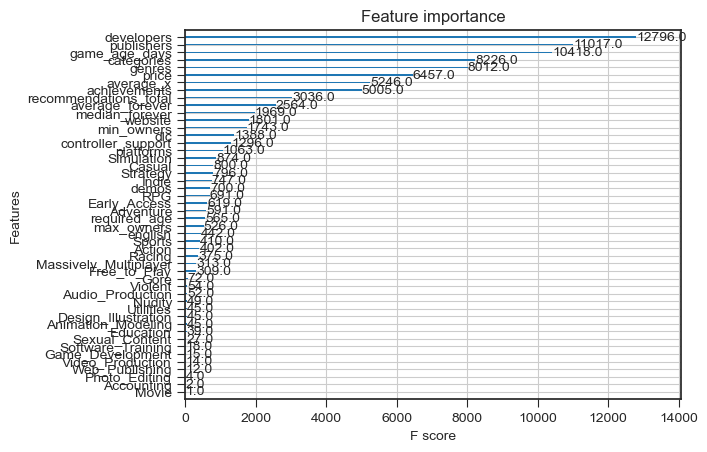

In [129]:
score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, early_stopping_rounds=10)

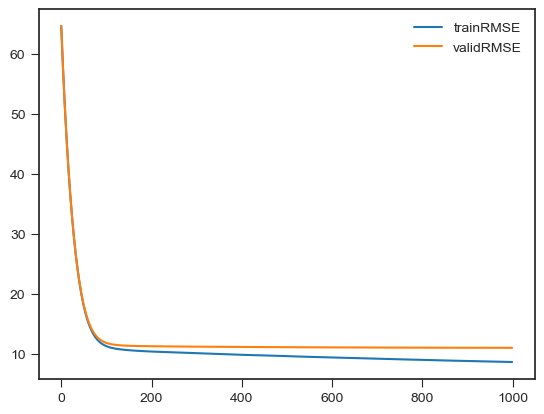

In [130]:
train_history.plot()
plt.show()

In [137]:
# Prepare the results object
resHists = dict()
rang = range(4,100,4)

# Check the model for different hyperparameter values
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=x, early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x, score)

# Plot the training and validation RMSE for each max_depth value
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# To increase the readability of the plots, we'll look at the history after 10 observations
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()


4 11.257665897385987
8 11.018087728168659
12 11.039597046802655
16 11.109344500582697
20 11.174175919448862
24 11.186074261430928
28 11.203366710922156
32 11.23670390727835
36 11.222419032301511
40 11.229752097879016
44 11.225195830817079
48 11.200745825975337
52 11.210386232655152
56 11.205330685561124
60 11.217850660464652
64 11.221561482435007
68 11.220740863189995
72 11.218105620573523
76 11.217148318253255
80 11.219180014928893
84 11.214047664139711
88 11.215159048311667


KeyboardInterrupt: 

0.3 11.251947167353029
0.4 11.232254303925165
0.5 11.230790192463544
0.6 11.189205782490431
0.7 11.210386232655152
0.8 11.228098921167499
0.9 11.193470872429867


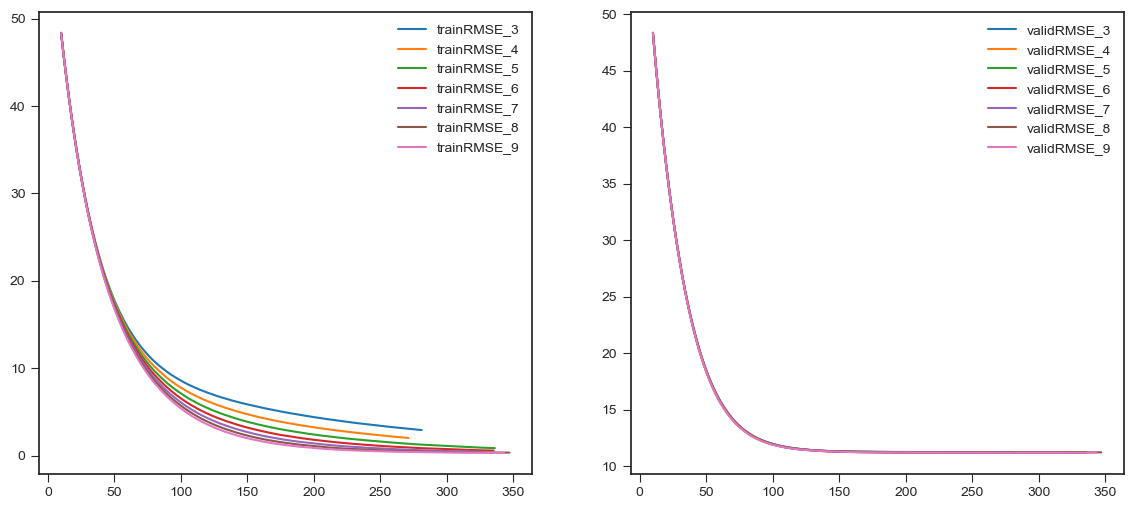

In [135]:
resHists = dict()
rang = range(3,10)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=52,  subsample=x/10,
                                                          early_stopping_rounds=50, debug=False, eval_metric= ["rmse"], objective = "reg:squarederror")
    resHists[x]=train_history
    print(x/10, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))
# Dla zwiększenia czytelności wykresów przyjrzymy się historii po 10 obserwacji
for x in rang:
    resHists[x][['trainRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validRMSE']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

In [ ]:
resHists = dict()
rang = range(3,10)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=8, subsample=0.7, colsample_bytree=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x/10, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# To increase the readability of the plots, we'll look at the history after 10 observations
for x in rang:
    resHists[x][['trainrmse']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validrmse']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()


In [ ]:
resHists = dict()
rang = range(3,11)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=8, subsample=0.7, colsample_bytree=0.7, colsample_bylevel=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# To increase the readability of the plots, we'll look at the history after 10 observations
for x in rang:
    resHists[x][['trainrmse']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validrmse']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

In [ ]:
resHists = dict()
rang = range(3,11)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target,
                                                          max_depth=8, subsample=0.7, colsample_bytree=1, colsample_bylevel=x/10,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))

# To increase the readability of the plots, we'll look at the history after 10 observations
for x in rang:
    resHists[x][['trainrmse']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validrmse']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()


### 4.3. Regularyzacja L2
Skoro walka z przetrenowaniem jest jednym z najważniejszych elementów tuningu modeli wykorzystujących XGBoost. Warto pomyśleć o regularyzacji. Autorzy biblioteki zaimplementowali różne mechanizmy umożliwiające walkę z przetrenowaniem, ale najczęściej stosowana jest właśnie regularyzacja L2.

W przypadku XGB najlepszym pierwszym krokiem jest zwykle ustalenie odpowiedniego poziomu regularyzacji L2 (`lambda`). Wybierzemy więc w pierwszej iteracji wartości od 0 do 49 iterując x^2 od 0 do 7. Stosujemy takie podejście ze względu na to, iż w praktyce zakres optymalnych wartości dla `lambdy` jest bardzo szeroki. Jednocześnie model nie powinien być bardzo wrażliwy na względnie małe zmiany parametrów.

In [ ]:
resHists = dict()

rang = range(0,8)
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, reg_lambda=x**2,
                                                          max_depth=8, subsample=0.7, colsample_bytree=0.7,
                                                          early_stopping_rounds=50, debug=False)
    
    print(x**2, score)
    resHists[x]=train_history
fig, ax = plt.subplots(1, 2, figsize=(14,6))
# Dla zwiększenia czytelności wykresów przyjrzymy się historii po 10 obserwacji
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

### 4.4 Parametr `gamma` - inny sposób na walkę z przetrenowaniem.
Na niektórych zbiorach dobranie odpowiedniej wielkości dla `gamma` pozwala na uzyskanie zdecydowanie lepszych rezultatów niż manipulacja `lambdą`. Warto zmniejszyć wielkość `lambda`, kiedy wprowadzamy dodatkową regularyzację. Parametr `gamma` jest podobny do parametru `min_impurity_decrease` w Random Forest. Parametr ten będzie wpływał na decyzję o tym czy dokonać kolejnego splitu czy też nie w zalezności od tego jak bardzo pomocne będzie jego wprowadzenie (czyli jak bardzo obniży się funkcja straty).

In [ ]:
resHists = dict()
rang = [0, 0.01, 0.1, 0.5, 1, 2, 5]
for x in rang:
    score, trainPred, testPred, train_history, impFig, imp = run_xgb(X_train, X_valid, features, target, lambdaX=4,
                                                          max_depth=8, subsample=0.7, colsample_bytree=0.7,
                                                          gamma=x,
                                                          early_stopping_rounds=50, debug=False)
    resHists[x]=train_history
    print(x, score)
fig, ax = plt.subplots(1, 2, figsize=(14,6))
# Dla zwiększenia czytelności wykresów przyjrzymy się historii po 10 obserwacji
for x in rang:
    resHists[x][['trainAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[0])
    resHists[x][['validAUC']].add_suffix('_'+str(x)).iloc[10:].plot(ax=ax[1])
plt.show()

In [138]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
rfe = RFE(model, n_features_to_select=5)  # choose the number of features you want to keep
fit = rfe.fit(X, y)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

NameError: name 'X' is not defined

In [139]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)  # choose an alpha value
model.fit(X, y)

print("Lasso model:", model)
print("Coefficients:", model.coef_)

NameError: name 'X' is not defined

In [140]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.1)  # choose an alpha value
model.fit(X, y)

print("Ridge model:", model)
print("Coefficients:", model.coef_)

NameError: name 'X' is not defined

In [141]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assume y_true are the true target values and y_pred are the predicted target values

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

NameError: name 'y_true' is not defined